# Objective:
## The objective of the analysis is to predict an item when sold, what is the probability that customer would file fraudulent  / Genuine warranty and to understand important factors associated with them.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_csv('Datasets/Warranty Claim.csv', index_col= 0 )

In [3]:
df.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,2,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,0,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,0,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


### EDA 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 11797
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            358 non-null    object 
 1   State             358 non-null    object 
 2   Area              358 non-null    object 
 3   City              358 non-null    object 
 4   Consumer_profile  358 non-null    object 
 5   Product_category  358 non-null    object 
 6   Product_type      358 non-null    object 
 7   AC_1001_Issue     358 non-null    int64  
 8   AC_1002_Issue     358 non-null    int64  
 9   AC_1003_Issue     358 non-null    int64  
 10  TV_2001_Issue     358 non-null    int64  
 11  TV_2002_Issue     358 non-null    int64  
 12  TV_2003_Issue     358 non-null    int64  
 13  Claim_Value       358 non-null    float64
 14  Service_Centre    358 non-null    int64  
 15  Product_Age       358 non-null    int64  
 16  Purchased_from    358 non-null    object 


In [5]:
df.shape

(358, 20)

In [6]:
# Checking for null values
df.isna().sum()

Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64

In [7]:
for i in df.columns:
    print(f"{i} is {df[i].dtype}")

Region is object
State is object
Area is object
City is object
Consumer_profile is object
Product_category is object
Product_type is object
AC_1001_Issue is int64
AC_1002_Issue is int64
AC_1003_Issue is int64
TV_2001_Issue is int64
TV_2002_Issue is int64
TV_2003_Issue is int64
Claim_Value is float64
Service_Centre is int64
Product_Age is int64
Purchased_from is object
Call_details is float64
Purpose is object
Fraud is int64


In [8]:
df.columns

Index(['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Service_Centre', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose', 'Fraud'],
      dtype='object')

In [9]:
# We will check how many records are Fraud and how many are genuine
df.Fraud.value_counts()

0    323
1     35
Name: Fraud, dtype: int64

In [10]:
# Getting all the unique values of columns in Dataset

def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [11]:
print_unique_col_values(df)

Region : ['South' 'North' 'North East' 'North West' 'South East' 'South West'
 'West' 'East']
State : ['Karnataka' 'Haryana' 'Tamil Nadu' 'Jharkhand' 'Kerala' 'Andhra Pradesh'
 'Bihar' 'Gujarat' 'Delhi' 'Maharashtra' 'West Bengal' 'Goa'
 'Jammu and Kashmir' 'Assam' 'Rajasthan' 'Madhya Pradesh' 'Uttar Pradesh'
 'Tripura' 'Himachal Pradesh' 'Orissa']
Area : ['Urban' 'Rural']
City : ['Bangalore' 'Chandigarh' 'Chennai' 'Ranchi' 'Kochi' 'Hyderabad' 'Patna'
 'Purnea' 'Vadodara' 'New Delhi' 'Mumbai' 'Ahmedabad' 'Pune' 'Kolkata'
 'Vizag' 'Panaji' 'Srinagar' 'Guwhati' 'Jaipur' 'Bhopal' 'Meerut' 'Delhi'
 'Agartala' 'Shimla' 'Bhubaneswar' 'Vijayawada' 'Lucknow']
Consumer_profile : ['Business' 'Personal']
Product_category : ['Entertainment' 'Household']
Product_type : ['TV' 'AC']
Purchased_from : ['Manufacturer' 'Dealer' 'Internet']
Purpose : ['Complaint' 'Claim' 'Other']


In [12]:
# Getting list of categorical colmns

cat_col = [col for col in df if df[col].dtype == 'O']
cat_col

['Region',
 'State',
 'Area',
 'City',
 'Consumer_profile',
 'Product_category',
 'Product_type',
 'Purchased_from',
 'Purpose']

In [13]:
for col in cat_col:
    print(df[col].value_counts())

South         85
North East    53
South East    50
West          49
East          39
North         33
North West    27
South West    22
Name: Region, dtype: int64
Andhra Pradesh       59
Tamil Nadu           46
Maharashtra          39
Karnataka            30
Gujarat              29
Kerala               28
Uttar Pradesh        24
Delhi                22
Bihar                19
West Bengal          19
Orissa               17
Goa                   5
Rajasthan             4
Madhya Pradesh        4
Jharkhand             4
Himachal Pradesh      2
Tripura               2
Jammu and Kashmir     2
Assam                 2
Haryana               1
Name: State, dtype: int64
Urban    229
Rural    129
Name: Area, dtype: int64
Chennai        46
Hyderabad      37
Mumbai         32
Bangalore      30
Kochi          28
Lucknow        21
Kolkata        19
Bhubaneswar    17
Vijayawada     16
Ahmedabad      16
New Delhi      15
Vadodara       13
Patna          10
Purnea          9
Pune            7
Delhi     

In [14]:
df.describe()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,0.332402,0.329609,0.203911,0.377095,0.452514,0.268156,11994.534916,12.812849,201.843575,11.931844,0.097765
std,0.629446,0.615182,0.529559,0.621943,0.670910,0.508353,12063.213579,1.766844,259.731564,11.559474,0.297413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.500000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4006.000000,12.000000,14.000000,1.600000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7194.000000,13.000000,60.000000,6.500000,0.000000
75%,0.000000,0.750000,0.000000,1.000000,1.000000,0.000000,15000.000000,15.000000,303.750000,23.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,50000.000000,16.000000,991.000000,30.000000,1.000000


In [15]:
df.corr()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
AC_1001_Issue,1.000000,0.468584,0.266681,-0.321085,-0.357181,-0.279346,-0.168205,0.066168,-0.005918,0.045816,-0.054376
AC_1002_Issue,0.468584,1.000000,0.480978,-0.325770,-0.362392,-0.283422,-0.116644,0.116185,0.068414,0.091954,-0.069450
AC_1003_Issue,0.266681,0.480978,1.000000,-0.234121,-0.260440,-0.203687,-0.008041,0.070839,0.106377,0.068399,-0.038005
TV_2001_Issue,-0.321085,-0.325770,-0.234121,1.000000,0.482737,0.388042,-0.167174,-0.009520,0.168359,0.115679,-0.003003
TV_2002_Issue,-0.357181,-0.362392,-0.260440,0.482737,1.000000,0.456304,-0.121435,-0.084317,0.247202,0.279644,0.086503
TV_2003_Issue,-0.279346,-0.283422,-0.203687,0.388042,0.456304,1.000000,0.075057,0.027963,0.056517,0.020613,0.066967
Claim_Value,-0.168205,-0.116644,-0.008041,-0.167174,-0.121435,0.075057,1.000000,-0.031916,-0.424868,-0.528135,0.236343
Service_Centre,0.066168,0.116185,0.070839,-0.009520,-0.084317,0.027963,-0.031916,1.000000,-0.123943,-0.120344,-0.023720
Product_Age,-0.005918,0.068414,0.106377,0.168359,0.247202,0.056517,-0.424868,-0.123943,1.000000,0.647403,-0.106918
Call_details,0.045816,0.091954,0.068399,0.115679,0.279644,0.020613,-0.528135,-0.120344,0.647403,1.000000,-0.105117


## Data Visualization

<AxesSubplot:xlabel='Fraud', ylabel='count'>

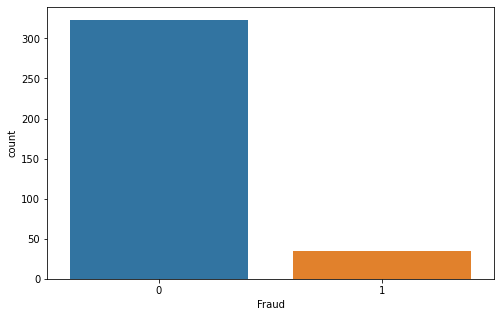

In [16]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Fraud', data = df)

In [17]:
# Print the ratio of fraud cases
ratio_cases = df.Fraud.value_counts()/len(df.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]*100}\nRatio of non-fraudulent cases: {ratio_cases[0]*100}')

Ratio of fraudulent cases: 9.776536312849162
Ratio of non-fraudulent cases: 90.22346368715084


<Figure size 432x288 with 0 Axes>

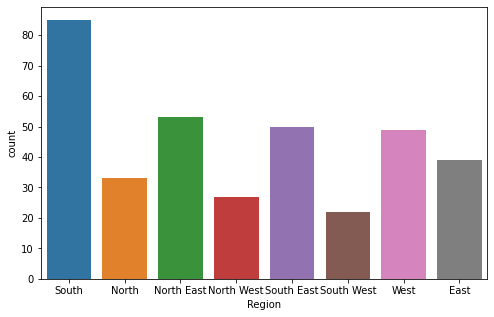

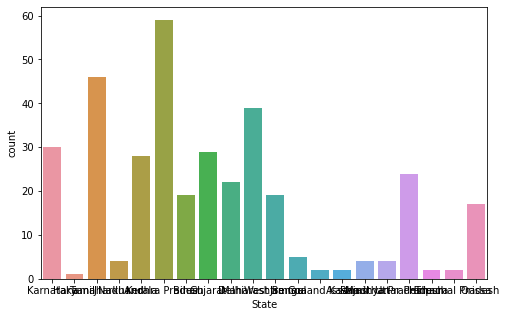

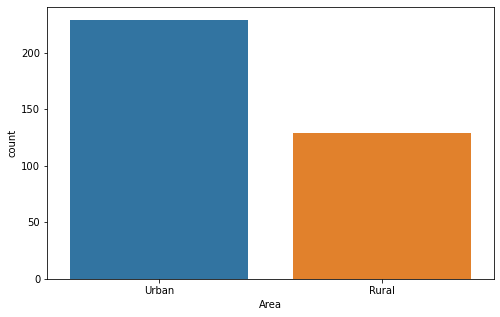

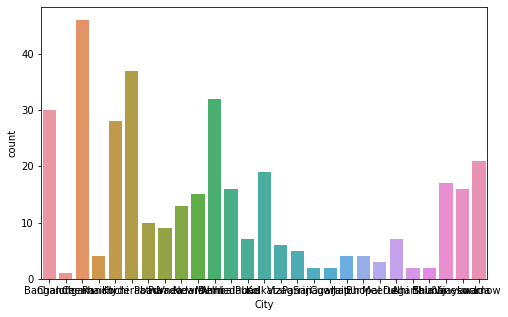

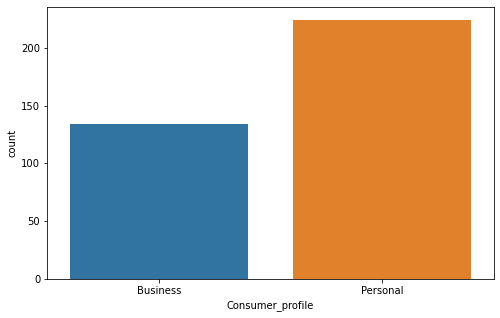

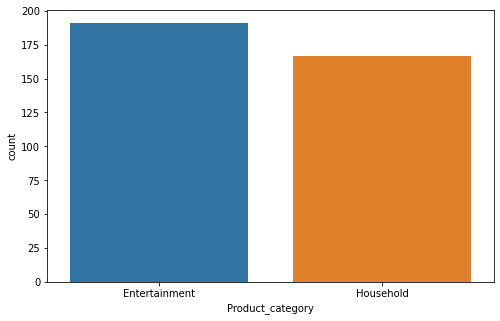

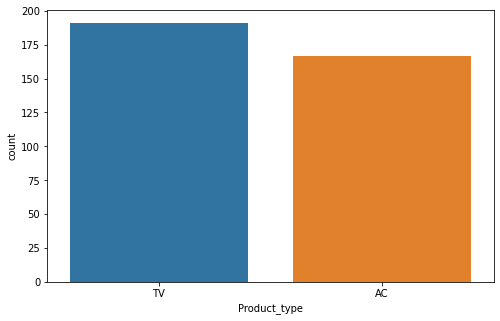

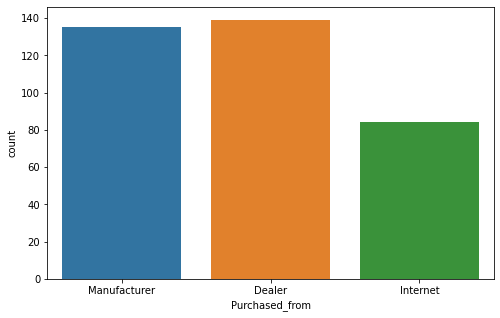

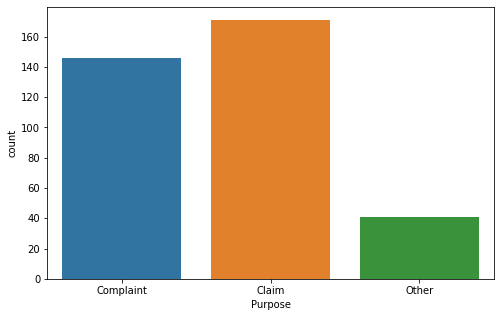

In [18]:
for i, col in enumerate(cat_col):
    plt.figure(i)
    plt.figure(figsize = (8, 5))
    sns.countplot(x=col, data=df)

#### We will check trend between each featue and our Target variable 'Fraud'

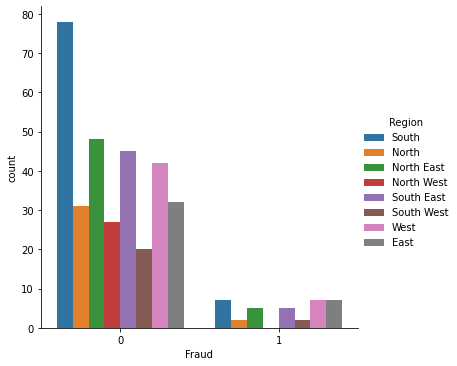

In [19]:
sns.catplot(x="Fraud", hue="Region",data=df, kind="count")

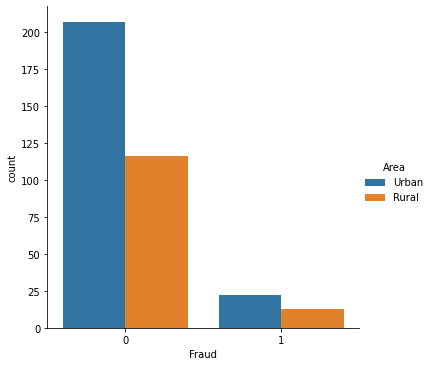

In [20]:
sns.catplot(x="Fraud", hue="Area",data=df, kind="count")

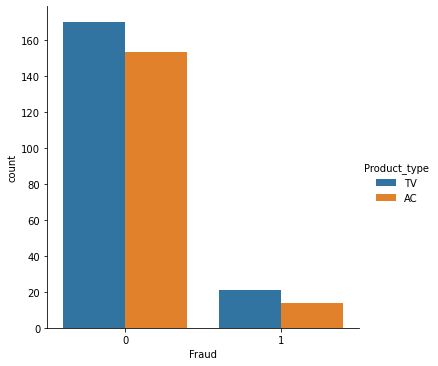

In [21]:
sns.catplot(x="Fraud", hue="Product_type",data=df, kind="count")

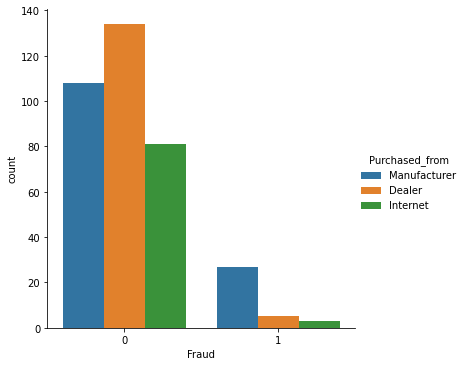

In [22]:
sns.catplot(x="Fraud", hue="Purchased_from",data=df, kind="count")

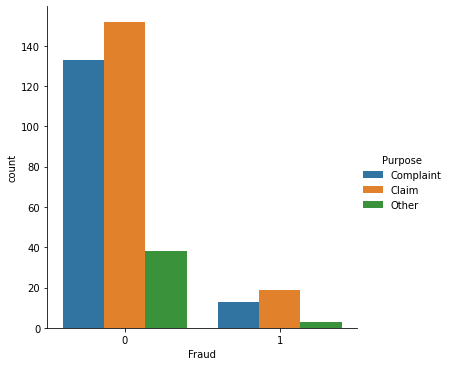

In [23]:
sns.catplot(x="Fraud", hue="Purpose",data=df, kind="count")

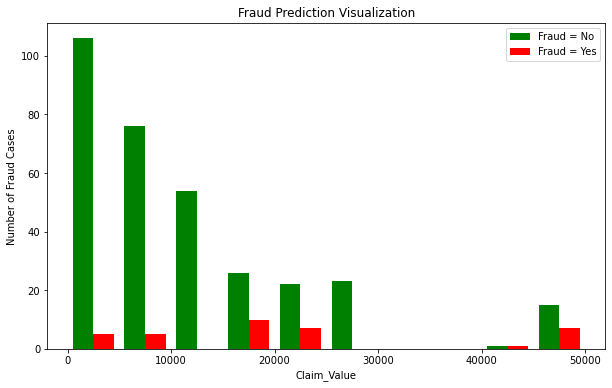

In [24]:
# claimed vaue and fraud cases:
Claim_value_yes = df[df.Fraud == 1].Claim_Value
Claim_value_no = df[df.Fraud == 0].Claim_Value
plt.figure(figsize=[10,6])
plt.xlabel('Claim_Value')
plt.ylabel('Number of Fraud Cases')
plt.title('Fraud Prediction Visualization')
plt.hist([Claim_value_no, Claim_value_yes], color = ['green', 'red'], label=['Fraud = No', 'Fraud = Yes'])
plt.legend()

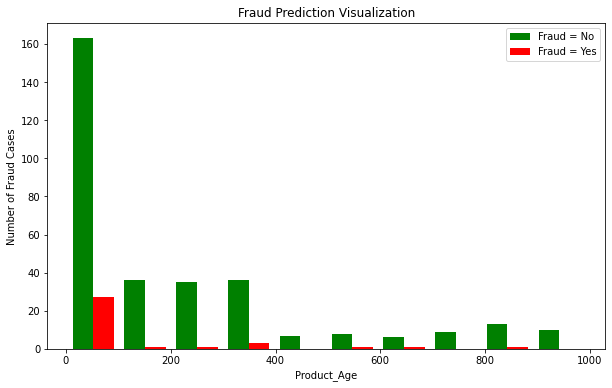

In [25]:
# Product Age and fraud cases:
Product_Age_yes = df[df.Fraud == 1].Product_Age
Product_Age_no = df[df.Fraud == 0].Product_Age
plt.figure(figsize=[10,6])
plt.xlabel('Product_Age')
plt.ylabel('Number of Fraud Cases')
plt.title('Fraud Prediction Visualization')
plt.hist([Product_Age_no, Product_Age_yes], color = ['green', 'red'], label=['Fraud = No', 'Fraud = Yes'])
plt.legend()

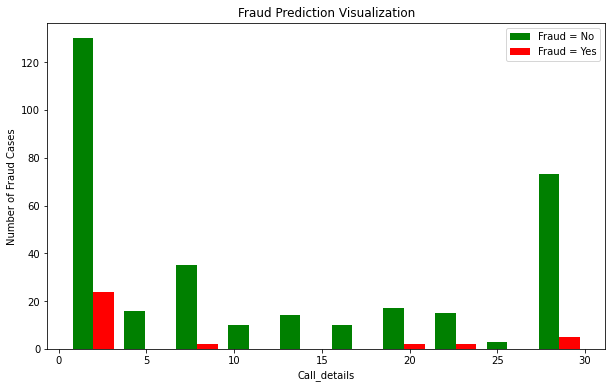

In [26]:
# Call duration and fraud cases:
Call_details_yes = df[df.Fraud == 1].Call_details
Call_details_no = df[df.Fraud == 0].Call_details
plt.figure(figsize=[10,6])
plt.xlabel('Call_details')
plt.ylabel('Number of Fraud Cases')
plt.title('Fraud Prediction Visualization')
plt.hist([Call_details_no, Call_details_yes], color = ['green', 'red'], label=['Fraud = No', 'Fraud = Yes'])
plt.legend()


In [27]:
def plot(df, col_name):
    fig, (ax1, ax2) = plt.subplots(2,1)
    sns.distplot(df[col_name], ax=ax1)
    sns.boxplot(df[col_name], ax=ax2)

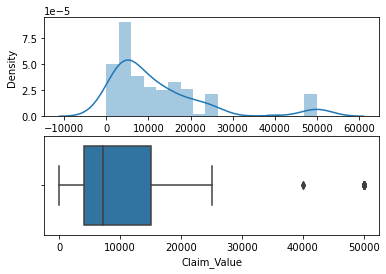

In [28]:
plot(df, 'Claim_Value')

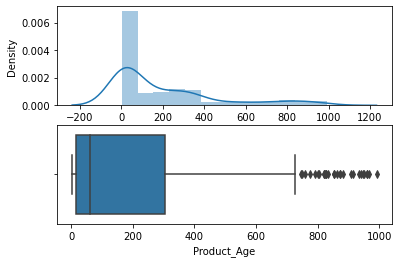

In [29]:
plot(df, 'Product_Age')

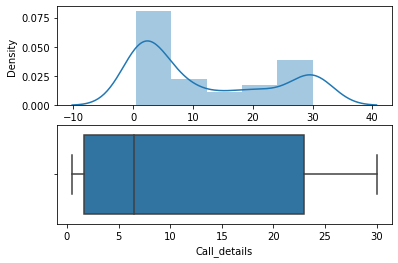

In [30]:
plot(df, 'Call_details')

# 

### Data Preprocessing

In [31]:
state_count = df['State'].value_counts()
state_count

Andhra Pradesh       59
Tamil Nadu           46
Maharashtra          39
Karnataka            30
Gujarat              29
Kerala               28
Uttar Pradesh        24
Delhi                22
Bihar                19
West Bengal          19
Orissa               17
Goa                   5
Rajasthan             4
Madhya Pradesh        4
Jharkhand             4
Himachal Pradesh      2
Tripura               2
Jammu and Kashmir     2
Assam                 2
Haryana               1
Name: State, dtype: int64

In [32]:
city_count = df.City.value_counts()
city_count

Chennai        46
Hyderabad      37
Mumbai         32
Bangalore      30
Kochi          28
Lucknow        21
Kolkata        19
Bhubaneswar    17
Vijayawada     16
Ahmedabad      16
New Delhi      15
Vadodara       13
Patna          10
Purnea          9
Pune            7
Delhi           7
Vizag           6
Panaji          5
Ranchi          4
Jaipur          4
Bhopal          4
Meerut          3
Srinagar        2
Shimla          2
Agartala        2
Guwhati         2
Chandigarh      1
Name: City, dtype: int64

#### Here we can see that some of the states and cities have less records in dataset. So we will group such records into single category as 'other_state' and 'other_citie to avoid multi-dimensionality problem.   

In [33]:
# We will group such records which have appeared for less than 10 times in dataset
state_less_10 = state_count[state_count <=10]
city_less_10 = city_count[city_count <= 10]

In [34]:
state_less_10

Goa                  5
Rajasthan            4
Madhya Pradesh       4
Jharkhand            4
Himachal Pradesh     2
Tripura              2
Jammu and Kashmir    2
Assam                2
Haryana              1
Name: State, dtype: int64

In [35]:
# Replacing each value of df['State'] where state is in state_less_10  
df['State']=df['State'].apply(lambda x: 'Other_state' if x in state_less_10 else x)
df.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Other_state,Urban,Chandigarh,Personal,Household,AC,0,1,2,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,0,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Other_state,Rural,Ranchi,Personal,Entertainment,TV,0,0,0,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


<AxesSubplot:xlabel='State', ylabel='count'>

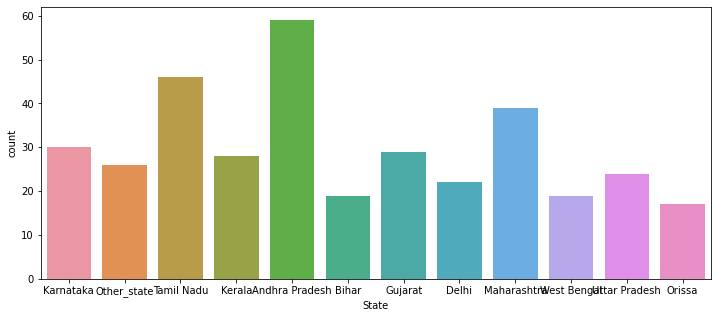

In [36]:
plt.figure(figsize=(12,5))
sns.countplot(df['State'])

In [37]:
city_less_10

Patna         10
Purnea         9
Pune           7
Delhi          7
Vizag          6
Panaji         5
Ranchi         4
Jaipur         4
Bhopal         4
Meerut         3
Srinagar       2
Shimla         2
Agartala       2
Guwhati        2
Chandigarh     1
Name: City, dtype: int64

In [38]:
# Replacing each value of df['State'] where state is in state_less_10 
df['City']=df['City'].apply(lambda x: 'Other_city' if x in city_less_10 else x)
df.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Other_state,Urban,Other_city,Personal,Household,AC,0,1,2,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,0,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Other_state,Rural,Other_city,Personal,Entertainment,TV,0,0,0,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


<AxesSubplot:xlabel='City', ylabel='count'>

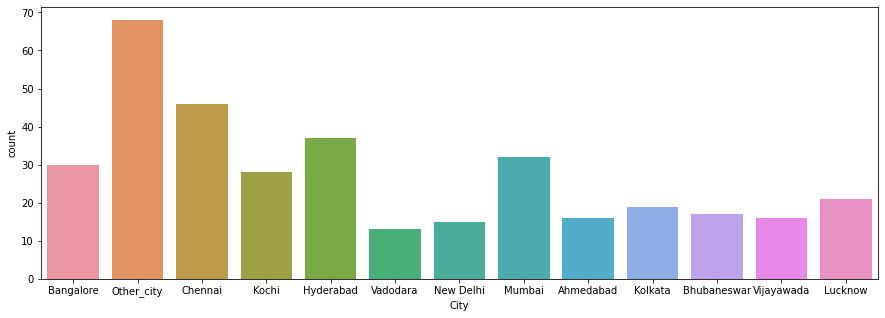

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(df['City'])

# 

### Handling Outliers

In [40]:
df.Claim_Value.describe()

count      358.000000
mean     11994.534916
std      12063.213579
min          0.000000
25%       4006.000000
50%       7194.000000
75%      15000.000000
max      50000.000000
Name: Claim_Value, dtype: float64

<AxesSubplot:xlabel='Claim_Value', ylabel='Density'>

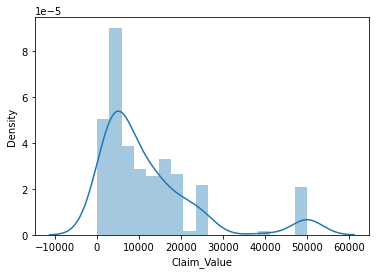

In [41]:
sns.distplot(df['Claim_Value'])

In [42]:
# Lets compute the Interquantile range to calculate the boundaries
IQR=df.Claim_Value.quantile(0.75)-df.Claim_Value.quantile(0.25)
IQR

10994.0

In [43]:
# Outliers which 1.5 standard deviation away
lower_limit=df['Claim_Value'].quantile(0.25)-(IQR*1.5)
upper_limit=df['Claim_Value'].quantile(0.75)+(IQR*1.5)
print(lower_limit), print(upper_limit)

-12485.0
31491.0


(None, None)

In [44]:
df[df['Claim_Value']>upper_limit]

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
8,South,Karnataka,Urban,Bangalore,Business,Household,AC,0,0,1,0,0,0,50000.0,10,18,Manufacturer,2.4,Claim,0
14,South East,Tamil Nadu,Rural,Chennai,Business,Entertainment,TV,0,0,0,1,1,1,50000.0,12,19,Manufacturer,1.3,Claim,0
20,North East,Karnataka,Urban,Bangalore,Personal,Household,AC,0,0,0,0,0,0,50000.0,15,15,Manufacturer,0.5,Claim,0
32,South,Bihar,Urban,Other_city,Business,Entertainment,TV,0,0,0,0,1,0,40000.0,10,14,Manufacturer,1.5,Claim,1
38,South East,Maharashtra,Urban,Mumbai,Business,Household,AC,0,0,1,0,0,0,50000.0,12,6,Dealer,2.4,Claim,0
44,North East,Bihar,Urban,Other_city,Personal,Household,AC,0,0,0,0,0,0,50000.0,15,4,Manufacturer,1.3,Claim,0
50,East,Andhra Pradesh,Urban,Hyderabad,Personal,Entertainment,TV,0,0,0,0,1,2,50000.0,13,18,Manufacturer,0.5,Claim,0
56,South,Tamil Nadu,Urban,Chennai,Business,Household,AC,0,0,0,0,0,0,50000.0,10,3,Manufacturer,1.6,Claim,0
66,South,Karnataka,Urban,Bangalore,Business,Household,AC,0,0,1,0,0,0,50000.0,10,18,Manufacturer,2.4,Claim,1
72,South East,Tamil Nadu,Rural,Chennai,Business,Entertainment,TV,0,0,0,1,1,1,50000.0,12,19,Manufacturer,1.3,Claim,1


In [45]:
df[df['Claim_Value']>upper_limit].shape

(24, 20)

In [46]:
# Extreme outliers
lower_bridge=df['Claim_Value'].quantile(0.25)-(IQR*3)
upper_bridge=df['Claim_Value'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-28976.0
47982.0


(None, None)

In [47]:
df[df['Claim_Value']>upper_bridge]

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
8,South,Karnataka,Urban,Bangalore,Business,Household,AC,0,0,1,0,0,0,50000.0,10,18,Manufacturer,2.4,Claim,0
14,South East,Tamil Nadu,Rural,Chennai,Business,Entertainment,TV,0,0,0,1,1,1,50000.0,12,19,Manufacturer,1.3,Claim,0
20,North East,Karnataka,Urban,Bangalore,Personal,Household,AC,0,0,0,0,0,0,50000.0,15,15,Manufacturer,0.5,Claim,0
38,South East,Maharashtra,Urban,Mumbai,Business,Household,AC,0,0,1,0,0,0,50000.0,12,6,Dealer,2.4,Claim,0
44,North East,Bihar,Urban,Other_city,Personal,Household,AC,0,0,0,0,0,0,50000.0,15,4,Manufacturer,1.3,Claim,0
50,East,Andhra Pradesh,Urban,Hyderabad,Personal,Entertainment,TV,0,0,0,0,1,2,50000.0,13,18,Manufacturer,0.5,Claim,0
56,South,Tamil Nadu,Urban,Chennai,Business,Household,AC,0,0,0,0,0,0,50000.0,10,3,Manufacturer,1.6,Claim,0
66,South,Karnataka,Urban,Bangalore,Business,Household,AC,0,0,1,0,0,0,50000.0,10,18,Manufacturer,2.4,Claim,1
72,South East,Tamil Nadu,Rural,Chennai,Business,Entertainment,TV,0,0,0,1,1,1,50000.0,12,19,Manufacturer,1.3,Claim,1
317,East,Uttar Pradesh,Urban,Lucknow,Personal,Household,AC,0,1,1,0,0,0,50000.0,13,12,Manufacturer,1.5,Claim,1


In [48]:
df[df['Claim_Value']>upper_bridge].shape

(22, 20)

In [49]:
median_CV = df['Claim_Value'].median()
median_CV

7194.0

In [50]:
df['Claim_Value']=np.where(df['Claim_Value']>upper_bridge,upper_bridge,df['Claim_Value'])
df['Claim_Value']=np.where(df['Claim_Value'] == 0,median_CV,df['Claim_Value'])

In [51]:
df.Claim_Value.describe()

count      358.000000
mean     12071.473464
std      11529.488906
min        170.000000
25%       4441.750000
50%       7214.500000
75%      15000.000000
max      47982.000000
Name: Claim_Value, dtype: float64

# 

In [52]:
df.Product_Age.describe()

count    358.000000
mean     201.843575
std      259.731564
min        3.000000
25%       14.000000
50%       60.000000
75%      303.750000
max      991.000000
Name: Product_Age, dtype: float64

<AxesSubplot:xlabel='Product_Age', ylabel='Density'>

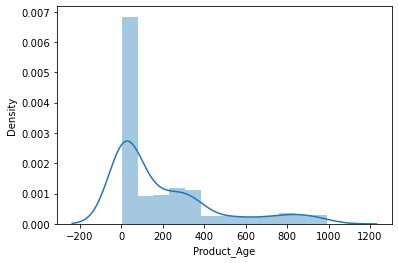

In [53]:
sns.distplot(df['Product_Age'])

In [54]:
# Lets compute the Interquantile range to calculate the boundaries
IQR=df.Product_Age.quantile(0.75)-df.Product_Age.quantile(0.25)
IQR

289.75

In [55]:
# Outliers which 1.5 standard deviation away
lower_limit=df['Product_Age'].quantile(0.25)-(IQR*1.5)
upper_limit=df['Product_Age'].quantile(0.75)+(IQR*1.5)
print(lower_limit), print(upper_limit)

-420.625
738.375


(None, None)

In [56]:
df[df['Product_Age']>upper_limit]

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
120,West,Maharashtra,Rural,Mumbai,Business,Entertainment,TV,0,0,0,0,2,1,4585.0,12,821,Manufacturer,17.0,Complaint,0
122,South West,Other_state,Rural,Other_city,Business,Entertainment,TV,0,0,0,0,2,1,6610.0,14,908,Dealer,30.0,Complaint,0
124,South East,Andhra Pradesh,Rural,Hyderabad,Personal,Household,AC,1,1,2,0,0,0,7760.0,13,854,Manufacturer,30.0,Complaint,0
129,South East,Andhra Pradesh,Urban,Hyderabad,Business,Entertainment,TV,0,0,0,1,1,0,4805.0,12,948,Dealer,3.0,Claim,0
136,South East,Andhra Pradesh,Rural,Other_city,Personal,Household,AC,0,1,0,0,0,0,4948.0,13,942,Manufacturer,30.0,Claim,0
138,North West,Other_state,Rural,Other_city,Personal,Entertainment,TV,0,0,0,1,1,1,7725.0,11,960,Manufacturer,30.0,Other,0
139,South,Kerala,Urban,Kochi,Personal,Entertainment,TV,0,0,0,1,1,1,4862.0,10,854,Dealer,30.0,Claim,0
140,North,Uttar Pradesh,Urban,Other_city,Business,Entertainment,TV,0,0,0,0,2,0,1656.0,14,827,Internet,30.0,Claim,0
141,South East,Andhra Pradesh,Urban,Hyderabad,Business,Household,AC,1,1,0,0,0,0,4000.0,15,864,Manufacturer,30.0,Other,0
146,North,Delhi,Rural,Other_city,Business,Household,AC,0,1,0,0,0,0,5316.0,12,872,Manufacturer,30.0,Claim,0


In [57]:
df[df['Product_Age']>upper_limit].shape

(29, 20)

In [58]:
# Extreme outliers
lower_bridge=df['Product_Age'].quantile(0.25)-(IQR*3)
upper_bridge=df['Product_Age'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-855.25
1173.0


(None, None)

In [59]:
df['Product_Age']=np.where(df['Product_Age']>upper_limit,upper_limit,df['Product_Age'])

In [60]:
df.Product_Age.describe()

count    358.000000
mean     191.684008
std      233.968754
min        3.000000
25%       14.000000
50%       60.000000
75%      303.750000
max      738.375000
Name: Product_Age, dtype: float64

# 

### Handling Categorical Features 

In [61]:
# The features which are having two categories only, we will replace them by 0 & 1  
df['Area'].replace({"Urban":1,"Rural":0},inplace =True)
df['Product_category'].replace({"Entertainment":1,"Household":0},inplace =True)
df['Consumer_profile'].replace({"Business":1,"Personal":0},inplace =True)
df['Product_type'].replace({"TV":1,"AC":0},inplace =True)
df['Purchased_from'].replace({"Manufacturer":2, "Dealer":1, "Internet":0}, inplace = True)
df['Purpose'].replace({"Claim":2, "Complaint":1, "Other":0}, inplace = True)

In [62]:
df['Service_Centre'] = df['Service_Centre'].astype('category')

In [63]:
df.dtypes

Region                object
State                 object
Area                   int64
City                  object
Consumer_profile       int64
Product_category       int64
Product_type           int64
AC_1001_Issue          int64
AC_1002_Issue          int64
AC_1003_Issue          int64
TV_2001_Issue          int64
TV_2002_Issue          int64
TV_2003_Issue          int64
Claim_Value          float64
Service_Centre      category
Product_Age          float64
Purchased_from         int64
Call_details         float64
Purpose                int64
Fraud                  int64
dtype: object

In [65]:
from sklearn.preprocessing import LabelEncoder
leb_enc = LabelEncoder()
df['Service_Centre'] = leb_enc.fit_transform(df['Service_Centre'])

In [66]:
df.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,1,Bangalore,1,1,1,0,0,0,1,2,0,15000.0,0,60.0,2,0.5,1,1
1,South,Karnataka,0,Bangalore,1,0,0,1,1,0,0,0,0,20000.0,2,10.0,1,1.0,1,0
2,North,Other_state,1,Other_city,0,0,0,0,1,2,0,0,0,18000.0,4,10.0,1,1.4,2,0
3,South,Tamil Nadu,1,Chennai,1,1,1,0,0,0,1,1,0,12000.0,6,20.0,2,2.0,1,0
4,North East,Other_state,0,Other_city,0,1,1,0,0,0,0,1,2,25000.0,5,6.0,1,1.3,2,0


In [67]:
# to get a view of all columns in dataset
pd.set_option('display.max_columns', None)

In [68]:
df1 = pd.get_dummies(data = df, columns=['Region', 'State', 'City'])
df1.head()

,Area,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud,Region_East,Region_North,Region_North East,Region_North West,Region_South,Region_South East,Region_South West,Region_West,State_Andhra Pradesh,State_Bihar,State_Delhi,State_Gujarat,State_Karnataka,State_Kerala,State_Maharashtra,State_Orissa,State_Other_state,State_Tamil Nadu,State_Uttar Pradesh,State_West Bengal,City_Ahmedabad,City_Bangalore,City_Bhubaneswar,City_Chennai,City_Hyderabad,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_New Delhi,City_Other_city,City_Vadodara,City_Vijayawada
0,1,1,1,1,0,0,0,1,2,0,15000.0,0,60.0,2,0.5,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,0,0,0,0,20000.0,2,10.0,1,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,2,0,0,0,18000.0,4,10.0,1,1.4,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,1,1,1,0,0,0,1,1,0,12000.0,6,20.0,2,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,1,2,25000.0,5,6.0,1,1.3,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [69]:
df1.shape

(358, 50)

#### Scaling Data

In [70]:
cols_to_scale = ['Claim_Value', 'Product_Age', 'Call_details']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [71]:
df1.head()

,Area,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud,Region_East,Region_North,Region_North East,Region_North West,Region_South,Region_South East,Region_South West,Region_West,State_Andhra Pradesh,State_Bihar,State_Delhi,State_Gujarat,State_Karnataka,State_Kerala,State_Maharashtra,State_Orissa,State_Other_state,State_Tamil Nadu,State_Uttar Pradesh,State_West Bengal,City_Ahmedabad,City_Bangalore,City_Bhubaneswar,City_Chennai,City_Hyderabad,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_New Delhi,City_Other_city,City_Vadodara,City_Vijayawada
0,1,1,1,1,0,0,0,1,2,0,0.254359,0,-0.563615,2,-0.990343,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,0,0,0,0,0.688636,2,-0.777618,1,-0.947028,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,2,0,0,0,0.514925,4,-0.777618,1,-0.912376,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,1,1,1,0,0,0,1,1,0,-0.006208,6,-0.734817,2,-0.860398,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,1,2,1.122914,5,-0.794738,1,-0.921039,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


###  We will split our data into training data and test data


In [72]:
X = df1.drop('Fraud', axis = 1)
y = df1['Fraud']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [74]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(286, 49)
(72, 49)
(286,)
(72,)


In [75]:
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

In [76]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        67
           1       0.00      0.00      0.00         5

    accuracy                           0.90        72
   macro avg       0.46      0.49      0.47        72
weighted avg       0.86      0.90      0.88        72



#### From above classification report, f1-score for the class 1 is 0. This is because our dataset is imbalanced and not able to classify correctly. So we have to balance our data in order to get the accurate and precise result   

# 

## Dealing with Imbalanced Data

In [77]:
# Importing classification algorithms 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [78]:
# Definig function, so that we can use it again for different models
def predict(X_train, X_test, y_train, y_test):
    # List of all names of algorithms
    names = ["Logistic Regression","Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]
    
    # Making list of all classifiers with parameters
    classifiers = [
    LogisticRegression(C=0.01, solver='liblinear'),
    KNeighborsClassifier(1),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=2),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=2, n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]
    
    scores = []
    f1_score_0 = []
    f1_score_1 = []
    precision_0 = []
    recall_0 = []
    precision_1 = []
    recall_1 = []
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        y_predicted = clf.predict(X_test)
        # Getting Accuracy of the classifiers and storing the same in scores list
        score = clf.score(X_test, y_test)
        scores.append(score)
        
        # Getting f1-score for the class 0 and storing the same in f1_score_0
        f1_0class = metrics.f1_score(y_test, y_predicted, pos_label=0)
        f1_score_0.append(f1_0class)
        
        # Getting f1-score for the class 1 and storing the same in f1_score_1
        f1_1class = metrics.f1_score(y_test, y_predicted, pos_label=1)
        f1_score_1.append(f1_1class)
        
        # Getting precision_score for the class 0 and storing the same in precision_0
        precision_0class = metrics.precision_score(y_test, y_predicted, pos_label=0)
        precision_0.append(precision_0class)
        
        # Getting precision_score for the class 1 and storing the same in precision_1
        precision_1class = metrics.precision_score(y_test, y_predicted, pos_label=1)
        precision_1.append(precision_1class)
        
        # Getting recall_score for the class 0 and storing the same in recall_0
        recall_0class = metrics.recall_score(y_test, y_predicted, pos_label=0)
        recall_0.append(recall_0class)
        
        # Getting recall_score for the class 1 and storing the same in recall_1
        recall_1class = metrics.recall_score(y_test, y_predicted, pos_label=1)
        recall_1.append(recall_1class)
        
    
    # Making dataframe for the model performance as per_df
    per_df = pd.DataFrame()
    per_df['name'] = names
    per_df['Accuracy'] = scores
    per_df['Precision Class: 0'] = precision_0
    per_df['Recall Class: 0'] = recall_0
    per_df['Precision Class: 1'] = precision_1
    per_df['Recall Class: 1'] = recall_1
    per_df['f1_score Class: 0'] = f1_score_0
    per_df['f1_score Class: 1'] = f1_score_1

    return per_df

In [79]:
from keras.models import Sequential
from keras.layers import Dense

In [94]:
# creating ANN model
def ANN(X_train, X_test, y_train, y_test):
    model = Sequential()
    model.add(Dense(12, input_dim=49, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train,y_train, epochs=100, batch_size=10)
    
    # evaluate the model
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    score = model.evaluate(X_test, y_test)
    
    print("\n")
    
    print("Classification Report: \n", classification_report(y_test, y_pred))  


#### 1. Undersampling Method

In [81]:
y_test.value_counts()

0    67
1     5
Name: Fraud, dtype: int64

In [82]:
# We will divide our target class into 1 and 0 
df_class_0 = df1[df1['Fraud'] == 0]
df_class_1 = df1[df1['Fraud'] == 1]

In [83]:
# class count
count_class_0, count_class_1 = df1.Fraud.value_counts()

In [84]:
count_class_0, count_class_1

(323, 35)

In [85]:
df_class_0.shape

(323, 50)

In [86]:
df_class_1.shape

(35, 50)

In [87]:
df_class_0_under = df_class_0.sample(count_class_1)

In [88]:
# We will concat df_class_0_under and df_class_1 datasets together
df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)

In [89]:
df_test_under.shape

(70, 50)

In [90]:
# Splitting data into X & y
X = df_test_under.drop('Fraud', axis = 1)
y = df_test_under['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56, 49)
(14, 49)
(56,)
(14,)


In [92]:
result = predict(X_train, X_test, y_train, y_test)
cm = sns.light_palette("green", as_cmap=True)
result_df = result.style.background_gradient(cmap=cm)
result_df 

,name,Accuracy,Precision Class: 0,Recall Class: 0,Precision Class: 1,Recall Class: 1,f1_score Class: 0,f1_score Class: 1
0,Logistic Regression,0.714286,0.800000,0.571429,0.666667,0.857143,0.666667,0.750000
1,Nearest_Neighbors,0.500000,0.500000,0.428571,0.500000,0.571429,0.461538,0.533333
2,Linear_SVM,0.785714,0.833333,0.714286,0.750000,0.857143,0.769231,0.800000
3,Polynomial_SVM,0.785714,0.700000,1.000000,1.000000,0.571429,0.823529,0.727273
4,RBF_SVM,0.500000,0.500000,1.000000,0.000000,0.000000,0.666667,0.000000
5,Gaussian_Process,0.571429,0.600000,0.428571,0.555556,0.714286,0.500000,0.625000
6,Gradient_Boosting,0.785714,0.833333,0.714286,0.750000,0.857143,0.769231,0.800000
7,Decision_Tree,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286
8,Extra_Trees,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286
9,Random_Forest,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143


In [95]:
# Checking for ANN
ANN(X_train, X_test, y_train, y_test)

Epoch 1/100
6/6 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4821
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5536
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5536
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5179
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.6429
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.6429
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.6429
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.6429
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.6429
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.6607
Epoch 11/100
6/6 [===========

6/6 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9286
Epoch 85/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.9286
Epoch 86/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2445 - accuracy: 0.9286
Epoch 87/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2420 - accuracy: 0.9286
Epoch 88/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2372 - accuracy: 0.9286
Epoch 89/100
6/6 [==============================] - 0s 5ms/step - loss: 0.2387 - accuracy: 0.9286
Epoch 90/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9464
Epoch 91/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9286
Epoch 92/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2245 - accuracy: 0.9286
Epoch 93/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2211 - accuracy: 0.9286
Epoch 94/100
6/6 [===============

#### 2. Oversampling method

In [96]:
count_class_0, count_class_1

(323, 35)

In [97]:
# We will oversample class 1
# replace = True will add duplicate samples in the dataset randomly 
df_class_1_over = df_class_1.sample(count_class_0, replace = True)

In [98]:
df_class_1_over.shape

(323, 50)

In [99]:
# Concatenating df_class_1_over and df_class_0
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)
df_test_over.shape

(646, 50)

In [100]:
print('Random Over Sampling')
print(df_test_over.Fraud.value_counts())

Random Over Sampling
1    323
0    323
Name: Fraud, dtype: int64


In [101]:
# Splitting data into X & y
X = df_test_over.drop('Fraud', axis = 1)
y = df_test_over['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(516, 49)
(130, 49)
(516,)
(130,)


In [103]:
result = predict(X_train, X_test, y_train, y_test)
cm = sns.light_palette("green", as_cmap=True)
result_df = result.style.background_gradient(cmap=cm)
result_df 

,name,Accuracy,Precision Class: 0,Recall Class: 0,Precision Class: 1,Recall Class: 1,f1_score Class: 0,f1_score Class: 1
0,Logistic Regression,0.638462,0.636364,0.646154,0.640625,0.630769,0.641221,0.635659
1,Nearest_Neighbors,0.923077,0.982456,0.861538,0.876712,0.984615,0.918033,0.927536
2,Linear_SVM,0.676923,0.676923,0.676923,0.676923,0.676923,0.676923,0.676923
3,Polynomial_SVM,0.500000,0.500000,0.276923,0.500000,0.723077,0.356436,0.591195
4,RBF_SVM,0.976923,1.000000,0.953846,0.955882,1.000000,0.976378,0.977444
5,Gaussian_Process,0.946154,1.000000,0.892308,0.902778,1.000000,0.943089,0.948905
6,Gradient_Boosting,0.946154,1.000000,0.892308,0.902778,1.000000,0.943089,0.948905
7,Decision_Tree,0.730769,0.682927,0.861538,0.812500,0.600000,0.761905,0.690265
8,Extra_Trees,0.938462,1.000000,0.876923,0.890411,1.000000,0.934426,0.942029
9,Random_Forest,0.730769,0.702703,0.800000,0.767857,0.661538,0.748201,0.710744


In [104]:
# Checking for ANN
ANN(X_train, X_test, y_train, y_test)

Epoch 1/100
52/52 [==============================] - 1s 3ms/step - loss: 0.6926 - accuracy: 0.5736
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.6783
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.6996
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.7287
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.7403
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.7597
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.7829
Epoch 8/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.7965
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8043
Epoch 10/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8256
Epoch 11/

52/52 [==============================] - 0s 2ms/step - loss: 0.0957 - accuracy: 0.9690
Epoch 83/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.9709
Epoch 84/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.9709
Epoch 85/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0951 - accuracy: 0.9709
Epoch 86/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 0.9709
Epoch 87/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0961 - accuracy: 0.9709
Epoch 88/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 0.9729
Epoch 89/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9748
Epoch 90/100
52/52 [==============================] - 0s 3ms/step - loss: 0.0905 - accuracy: 0.9729
Epoch 91/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9748
Epoch 92/100


#### 3. SMOTE

In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
X = df1.drop('Fraud', axis = 1)
y = df1['Fraud']

In [107]:
y.value_counts()

0    323
1     35
Name: Fraud, dtype: int64

In [108]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    323
0    323
Name: Fraud, dtype: int64

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 15, 
                                                    stratify = y_sm)

In [110]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(516, 49)
(130, 49)
(516,)
(130,)


In [111]:
y_train.value_counts()

1    258
0    258
Name: Fraud, dtype: int64

In [112]:
y_test.value_counts()

1    65
0    65
Name: Fraud, dtype: int64

In [113]:
result = predict(X_train, X_test, y_train, y_test)
cm = sns.light_palette("green", as_cmap=True)
result_df = result.style.background_gradient(cmap=cm)
result_df

,name,Accuracy,Precision Class: 0,Recall Class: 0,Precision Class: 1,Recall Class: 1,f1_score Class: 0,f1_score Class: 1
0,Logistic Regression,0.792308,0.827586,0.738462,0.763889,0.846154,0.780488,0.802920
1,Nearest_Neighbors,0.846154,0.909091,0.769231,0.800000,0.923077,0.833333,0.857143
2,Linear_SVM,0.853846,0.910714,0.784615,0.810811,0.923077,0.842975,0.863309
3,Polynomial_SVM,0.600000,0.782609,0.276923,0.560748,0.923077,0.409091,0.697674
4,RBF_SVM,0.823077,0.756098,0.953846,0.937500,0.692308,0.843537,0.796460
5,Gaussian_Process,0.915385,0.950000,0.876923,0.885714,0.953846,0.912000,0.918519
6,Gradient_Boosting,0.907692,0.934426,0.876923,0.884058,0.938462,0.904762,0.910448
7,Decision_Tree,0.761538,0.742857,0.800000,0.783333,0.723077,0.770370,0.752000
8,Extra_Trees,0.923077,0.950820,0.892308,0.898551,0.953846,0.920635,0.925373
9,Random_Forest,0.784615,0.776119,0.800000,0.793651,0.769231,0.787879,0.781250


In [114]:
# Checking for ANN
ANN(X_train, X_test, y_train, y_test)

Epoch 1/100
52/52 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5562
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.7403
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.7597
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7713
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.7984
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8159
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8430
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8585
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8740
Epoch 10/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2836 - accuracy: 0.8837
Epoch 11/

52/52 [==============================] - 0s 2ms/step - loss: 0.0886 - accuracy: 0.9593
Epoch 84/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0912 - accuracy: 0.9651
Epoch 85/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 0.9709
Epoch 86/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0870 - accuracy: 0.9671
Epoch 87/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0864 - accuracy: 0.9651
Epoch 88/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 0.9612
Epoch 89/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.9535
Epoch 90/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.9729
Epoch 91/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9651
Epoch 92/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.9671
Epoch 93/100


# 

### SVMSMOTE

In [115]:
from imblearn.over_sampling import SVMSMOTE

In [116]:
X = df1.drop('Fraud', axis = 1)
y = df1['Fraud']

In [117]:
y.value_counts()

0    323
1     35
Name: Fraud, dtype: int64

In [118]:
smote_svm = SVMSMOTE()
X_sm, y_sm = smote_svm.fit_sample(X, y)

y_sm.value_counts()

1    323
0    323
Name: Fraud, dtype: int64

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 15, 
                                                    stratify = y_sm)

In [120]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(516, 49)
(130, 49)
(516,)
(130,)


In [121]:
y_train.value_counts()

1    258
0    258
Name: Fraud, dtype: int64

In [122]:
y_test.value_counts()

1    65
0    65
Name: Fraud, dtype: int64

In [123]:
result = predict(X_train, X_test, y_train, y_test)
cm = sns.light_palette("green", as_cmap=True)
result_df = result.style.background_gradient(cmap=cm)
result_df

,name,Accuracy,Precision Class: 0,Recall Class: 0,Precision Class: 1,Recall Class: 1,f1_score Class: 0,f1_score Class: 1
0,Logistic Regression,0.846154,0.909091,0.769231,0.800000,0.923077,0.833333,0.857143
1,Nearest_Neighbors,0.869231,0.928571,0.800000,0.824324,0.938462,0.859504,0.877698
2,Linear_SVM,0.861538,0.885246,0.830769,0.840580,0.892308,0.857143,0.865672
3,Polynomial_SVM,0.700000,0.861111,0.476923,0.638298,0.923077,0.613861,0.754717
4,RBF_SVM,0.853846,0.794872,0.953846,0.942308,0.753846,0.867133,0.837607
5,Gaussian_Process,0.907692,0.964912,0.846154,0.863014,0.969231,0.901639,0.913043
6,Gradient_Boosting,0.900000,0.948276,0.846154,0.861111,0.953846,0.894309,0.905109
7,Decision_Tree,0.876923,0.888889,0.861538,0.865672,0.892308,0.875000,0.878788
8,Extra_Trees,0.907692,0.949153,0.861538,0.873239,0.953846,0.903226,0.911765
9,Random_Forest,0.846154,0.894737,0.784615,0.808219,0.907692,0.836066,0.855072


In [124]:
# Checking for ANN
ANN(X_train, X_test, y_train, y_test)

Epoch 1/100
52/52 [==============================] - 1s 3ms/step - loss: 0.6920 - accuracy: 0.5853
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.8256
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.8391
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.8295
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8430
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8527
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8663
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8682
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.8721
Epoch 10/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.8876
Epoch 11/

52/52 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 0.9748
Epoch 84/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0867 - accuracy: 0.9690
Epoch 85/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0895 - accuracy: 0.9748
Epoch 86/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9729
Epoch 87/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9787
Epoch 88/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.9729
Epoch 89/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.9729
Epoch 90/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0767 - accuracy: 0.9729
Epoch 91/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9748
Epoch 92/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9806
Epoch 93/100


# 

### BorderlineSMOTE

In [125]:
from imblearn.over_sampling import BorderlineSMOTE

In [126]:
X = df1.drop('Fraud', axis = 1)
y = df1['Fraud']

In [127]:
y.value_counts()

0    323
1     35
Name: Fraud, dtype: int64

In [128]:
smote_bl = BorderlineSMOTE()
X_sm, y_sm = smote_bl.fit_sample(X, y)

y_sm.value_counts()

1    323
0    323
Name: Fraud, dtype: int64

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 15, 
                                                    stratify = y_sm)

In [130]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(516, 49)
(130, 49)
(516,)
(130,)


In [131]:
y_train.value_counts()

1    258
0    258
Name: Fraud, dtype: int64

In [132]:
y_test.value_counts()

1    65
0    65
Name: Fraud, dtype: int64

In [133]:
result = predict(X_train, X_test, y_train, y_test)
cm = sns.light_palette("green", as_cmap=True)
result_df = result.style.background_gradient(cmap=cm)
result_df

,name,Accuracy,Precision Class: 0,Recall Class: 0,Precision Class: 1,Recall Class: 1,f1_score Class: 0,f1_score Class: 1
0,Logistic Regression,0.769231,0.786885,0.738462,0.753623,0.800000,0.761905,0.776119
1,Nearest_Neighbors,0.853846,0.925926,0.769231,0.802632,0.938462,0.840336,0.865248
2,Linear_SVM,0.807692,0.803030,0.815385,0.812500,0.800000,0.809160,0.806202
3,Polynomial_SVM,0.746154,0.735294,0.769231,0.758065,0.723077,0.751880,0.740157
4,RBF_SVM,0.876923,0.826667,0.953846,0.945455,0.800000,0.885714,0.866667
5,Gaussian_Process,0.923077,0.966102,0.876923,0.887324,0.969231,0.919355,0.926471
6,Gradient_Boosting,0.876923,0.929825,0.815385,0.835616,0.938462,0.868852,0.884058
7,Decision_Tree,0.776923,0.736842,0.861538,0.833333,0.692308,0.794326,0.756303
8,Extra_Trees,0.892308,0.904762,0.876923,0.880597,0.907692,0.890625,0.893939
9,Random_Forest,0.800000,0.791045,0.815385,0.809524,0.784615,0.803030,0.796875


In [134]:
# Checking for ANN
ANN(X_train, X_test, y_train, y_test)

Epoch 1/100
52/52 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5620
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.7926
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5934 - accuracy: 0.8004
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.8159
Epoch 5/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.8236
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8372
Epoch 7/100
52/52 [==============================] - ETA: 0s - loss: 0.3536 - accuracy: 0.84 - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8430
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8372
Epoch 9/100
52/52 [==============================] - 0s 3ms/step - loss: 0.2980 - accuracy: 0.8605
Epoch 10/100
52/52 [==============================] - 0s 3ms/step -

52/52 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.9690
Epoch 83/100
52/52 [==============================] - 0s 2ms/step - loss: 0.1107 - accuracy: 0.9535
Epoch 84/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9593
Epoch 85/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.9651
Epoch 86/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0937 - accuracy: 0.9612
Epoch 87/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9651
Epoch 88/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.9671
Epoch 89/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0964 - accuracy: 0.9632
Epoch 90/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9574
Epoch 91/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9574
Epoch 92/100


#### ADASYN

In [135]:
from imblearn.over_sampling import ADASYN

In [136]:
X = df1.drop('Fraud', axis = 1)
y = df1['Fraud']

In [137]:
y.value_counts()

0    323
1     35
Name: Fraud, dtype: int64

In [138]:
smote_ad = ADASYN()
X_ad, y_ad = smote_ad.fit_sample(X, y)

y_ad.value_counts()

1    329
0    323
Name: Fraud, dtype: int64

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_ad, y_ad, test_size = 0.2, random_state = 15, 
                                                    stratify = y_ad)

In [140]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(521, 49)
(131, 49)
(521,)
(131,)


In [141]:
y_train.value_counts()

1    263
0    258
Name: Fraud, dtype: int64

In [142]:
y_test.value_counts()

1    66
0    65
Name: Fraud, dtype: int64

In [143]:
result = predict(X_train, X_test, y_train, y_test)
cm = sns.light_palette("green", as_cmap=True)
result_df = result.style.background_gradient(cmap=cm)
result_df

,name,Accuracy,Precision Class: 0,Recall Class: 0,Precision Class: 1,Recall Class: 1,f1_score Class: 0,f1_score Class: 1
0,Logistic Regression,0.717557,0.705882,0.738462,0.730159,0.696970,0.721805,0.713178
1,Nearest_Neighbors,0.877863,0.945455,0.800000,0.828947,0.954545,0.866667,0.887324
2,Linear_SVM,0.824427,0.828125,0.815385,0.820896,0.833333,0.821705,0.827068
3,Polynomial_SVM,0.610687,0.818182,0.276923,0.568807,0.939394,0.413793,0.708571
4,RBF_SVM,0.801527,0.729412,0.953846,0.934783,0.651515,0.826667,0.767857
5,Gaussian_Process,0.923664,0.966102,0.876923,0.888889,0.969697,0.919355,0.927536
6,Gradient_Boosting,0.893130,0.932203,0.846154,0.861111,0.939394,0.887097,0.898551
7,Decision_Tree,0.679389,0.641975,0.800000,0.740000,0.560606,0.712329,0.637931
8,Extra_Trees,0.893130,0.932203,0.846154,0.861111,0.939394,0.887097,0.898551
9,Random_Forest,0.763359,0.742857,0.800000,0.786885,0.727273,0.770370,0.755906


In [144]:
# Checking for ANN
ANN(X_train, X_test, y_train, y_test)

Epoch 1/100
53/53 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5163
Epoch 2/100
53/53 [==============================] - 0s 3ms/step - loss: 0.6705 - accuracy: 0.7428
Epoch 3/100
53/53 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.7524
Epoch 4/100
53/53 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.7812
Epoch 5/100
53/53 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8061
Epoch 6/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8445
Epoch 7/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8676
Epoch 8/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8676
Epoch 9/100
53/53 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8676
Epoch 10/100
53/53 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.8695
Epoch 11/

53/53 [==============================] - 0s 2ms/step - loss: 0.1025 - accuracy: 0.9578
Epoch 84/100
53/53 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.9655
Epoch 85/100
53/53 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9501
Epoch 86/100
53/53 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9655
Epoch 87/100
53/53 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9616
Epoch 88/100
53/53 [==============================] - 0s 2ms/step - loss: 0.1048 - accuracy: 0.9520
Epoch 89/100
53/53 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9559
Epoch 90/100
53/53 [==============================] - 0s 2ms/step - loss: 0.1293 - accuracy: 0.9463
Epoch 91/100
53/53 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9578
Epoch 92/100
53/53 [==============================] - 0s 2ms/step - loss: 0.0979 - accuracy: 0.9616
Epoch 93/100


# 

## Building final model 

In [145]:
final_model = AdaBoostClassifier()

In [146]:
df1.columns

Index(['Area', 'Consumer_profile', 'Product_category', 'Product_type',
       'AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue', 'TV_2001_Issue',
       'TV_2002_Issue', 'TV_2003_Issue', 'Claim_Value', 'Service_Centre',
       'Product_Age', 'Purchased_from', 'Call_details', 'Purpose', 'Fraud',
       'Region_East', 'Region_North', 'Region_North East', 'Region_North West',
       'Region_South', 'Region_South East', 'Region_South West', 'Region_West',
       'State_Andhra Pradesh', 'State_Bihar', 'State_Delhi', 'State_Gujarat',
       'State_Karnataka', 'State_Kerala', 'State_Maharashtra', 'State_Orissa',
       'State_Other_state', 'State_Tamil Nadu', 'State_Uttar Pradesh',
       'State_West Bengal', 'City_Ahmedabad', 'City_Bangalore',
       'City_Bhubaneswar', 'City_Chennai', 'City_Hyderabad', 'City_Kochi',
       'City_Kolkata', 'City_Lucknow', 'City_Mumbai', 'City_New Delhi',
       'City_Other_city', 'City_Vadodara', 'City_Vijayawada'],
      dtype='object')

In [158]:
X = df1.drop(['Region_East', 'Region_North','Region_North East', 'Region_North West', 'Region_South','Region_South East',
             'Region_South West', 'Region_West','State_Andhra Pradesh', 'State_Bihar', 'State_Delhi', 'State_Gujarat',
             'State_Karnataka', 'State_Kerala', 'State_Maharashtra', 'State_Orissa','State_Other_state', 'State_Tamil Nadu',
             'State_Uttar Pradesh','State_West Bengal', 'City_Ahmedabad', 'City_Bangalore','City_Bhubaneswar', 'City_Chennai',
             'City_Hyderabad', 'City_Kochi','City_Kolkata', 'City_Lucknow', 'City_Mumbai', 'City_New Delhi','City_Other_city',
             'City_Vadodara', 'City_Vijayawada','Fraud'], axis = 1)
y = df1['Fraud']

In [159]:
X

,Area,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose
0,1,1,1,1,0,0,0,1,2,0,0.254359,0,-0.563615,2,-0.990343,1
1,0,1,0,0,1,1,0,0,0,0,0.688636,2,-0.777618,1,-0.947028,1
2,1,0,0,0,0,1,2,0,0,0,0.514925,4,-0.777618,1,-0.912376,2
3,1,1,1,1,0,0,0,1,1,0,-0.006208,6,-0.734817,2,-0.860398,1
4,0,0,1,1,0,0,0,0,1,2,1.122914,5,-0.794738,1,-0.921039,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11328,0,0,1,1,0,0,0,0,0,0,-0.423635,3,-0.807578,2,-0.990343,1
11522,0,0,1,1,0,0,0,1,1,1,-0.423635,5,-0.769058,2,-0.895050,1
11682,1,0,1,1,0,0,0,2,0,0,-0.423635,5,0.266716,1,-0.253986,2
11685,1,0,0,0,1,1,1,0,0,0,3.119027,3,-0.769058,2,-0.903713,2


In [160]:
smote_bl = BorderlineSMOTE()
X_sm, y_sm = smote_bl.fit_sample(X, y)

y_sm.value_counts()

1    323
0    323
Name: Fraud, dtype: int64

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 15, 
                                                    stratify = y_sm)

In [162]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(516, 16)
(130, 16)
(516,)
(130,)


In [163]:
final_model.fit(X_train, y_train)

AdaBoostClassifier()

In [164]:
y_predicted = final_model.predict(X_test)

In [165]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        65
           1       0.88      0.94      0.91        65

    accuracy                           0.91       130
   macro avg       0.91      0.91      0.91       130
weighted avg       0.91      0.91      0.91       130



In [166]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf

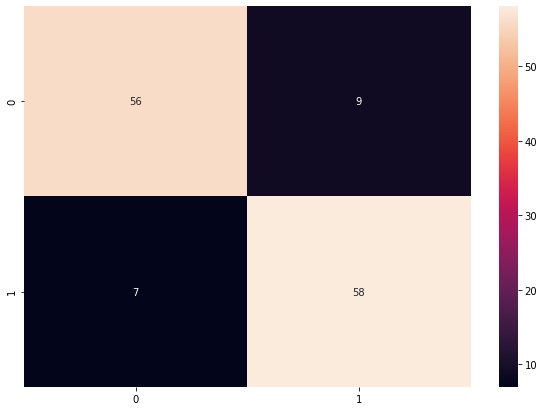

In [156]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel = ("Predicted")
plt.ylabel = ("Truth")

In [167]:
import pickle
pickle_out = open("final_model.pkl","wb")
pickle.dump(final_model,pickle_out)
pickle_out.close()